# Ice Gaming Store

Ice Store is an Online Gaming Store, and in order to create future publicitary campaigns and projects, they have asked for a deep analysis into their dataset of games to get a wide and objective panorama on which games are popular in their platform.

## Libraries and Dara Import

First we should import all the tools or libraries that we are expectedly going to use on this analysis

In [3]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import statistics as stats
import math

Then we proceed to get our data in a dataframe and see their attributes

In [4]:
df_games = pd.read_csv('./games.csv')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The next thing to do on our analysis is to filter the data to make it usable on our analysis

## Prepare the data

### Format Fix

In [5]:
# Make the column titles lowercase
df_games.columns = df_games.columns.str.lower()
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


From the beggining point we can see that we have critical values missing, "critic_score", "rating" and "user_score". This can happen due to a bad management of the data, data losses via powerbreaks or problems with the system, or any other cases where the data would change in a way it was'nt planned to do so.

### Rating Column Removal

In [6]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Taking a closer look to the data, we can notice that we need to choose what columns we need to contemplate further and which ones we need to drop for our analysis.

We will not contemplate the column "rating" for the following reasons:
* Half of the values missing, which leads us to having a 50% chance of reliability on the data if we where to reeplace those value with generic ones. And also that generic values can be hard to tell when tagging games.
* The columns do not have a strong relation with the popularity of a game as "user_score" or "critic_score" does

With that clarified we will proceed to erase the column from our analysis

In [7]:
# Erase not usable columns
del df_games['rating']
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN


With the column "user_score" remaining we will need to fill it with generic data to use the values on the analysis instead of having NaN's and convert it to an float type column

### User score and Critic Score Cleaning and Formatting

In [8]:
# Separate tbd userscore games with the others
tbd_games = df_games[df_games['user_score']=='tbd']
df_games = df_games[~df_games.isin(['tbd']).any(axis=1)]
print(f"Number of To be Determined games: {len(tbd_games)}")
print(f"Number of games with userscore: {len(df_games)}")

Number of To be Determined games: 2424
Number of games with userscore: 14291


In [9]:
# Search for all unique values on object column to see if we have strings
print(df_games['user_score'].unique())
# Reeplace the values we found as string
df_games['user_score'] = df_games['user_score'].fillna(0)
# Print unique values again
print(df_games['user_score'].unique())


['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
['8' 0 '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '

C:\Users\iansi\AppData\Local\Temp\ipykernel_18768\2737665819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games['user_score'] = df_games['user_score'].fillna(0)


Same for Critic Score

In [10]:
print(df_games['critic_score'].unique())
# Reeplace the values we found as string
df_games['critic_score'] = df_games['critic_score'].fillna(0)
# Print unique values again
print(df_games['critic_score'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 48. 57. 29. 47. 65. 55. 54.
 20. 53. 38. 33. 52. 30. 32. 43. 45. 40. 46. 51. 39. 34. 35. 41. 36. 37.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
[76.  0. 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 48. 57. 29. 47. 65. 55. 54.
 20. 53. 38. 33. 52. 30. 32. 43. 45. 40. 46. 51. 39. 34. 35. 41. 36. 37.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


C:\Users\iansi\AppData\Local\Temp\ipykernel_18768\1381547761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games['critic_score'] = df_games['critic_score'].fillna(0)


In [11]:
# Convert all values of user_score to float
df_games['user_score'] = df_games['user_score'].astype(float)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14291 entries, 0 to 16714
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14289 non-null  object 
 1   platform         14291 non-null  object 
 2   year_of_release  14070 non-null  float64
 3   genre            14289 non-null  object 
 4   na_sales         14291 non-null  float64
 5   eu_sales         14291 non-null  float64
 6   jp_sales         14291 non-null  float64
 7   other_sales      14291 non-null  float64
 8   critic_score     14291 non-null  float64
 9   user_score       14291 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.2+ MB


C:\Users\iansi\AppData\Local\Temp\ipykernel_18768\1821786365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games['user_score'] = df_games['user_score'].astype(float)


Now that we have our columns correctly we can head out and calculate the generic value that is going to be on the user_score

In [12]:
## USER_SCORE
# Get only the values that were not changes on the last step
valid_scores = df_games[df_games['user_score']>0]['user_score']
# Get the mean of the column
mean_user_score = valid_scores.mean()
# Get the meadian of the column
median_user_score = valid_scores.median()
# Print values
print(f"Mean: {mean_user_score}, Median: {median_user_score}")

Mean: 7.125984978258005, Median: 7.5


In [13]:
## CRITIC_SCORE
# Get only the values that were not changes on the last step
valid_scores = df_games[df_games['critic_score']>0]['critic_score']
# Get the mean of the column
mean_critic_score = valid_scores.mean()
# Get the meadian of the column
median_critic_score = valid_scores.median()
# Print values
print(f"Mean: {mean_critic_score}, Median: {median_critic_score}")

Mean: 70.2338766832034, Median: 72.0


In [14]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0.0
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0.0


We identified that the mean and the median are not that different from each other, which explains that the data does not have atypical values that alters the median value. In this case we will assign the Median value since is not do sdifferent from the mean.

In [15]:
# Assign 7.5 and 7.2 that was the value of our median on the last step
df_games.loc[df_games['user_score'] == 0.0, 'user_score'] = median_user_score
df_games.loc[df_games['critic_score'] == 0.0, 'critic_score'] = median_critic_score
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,72.0,7.5
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,72.0,7.5
...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,72.0,7.5
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,72.0,7.5
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,72.0,7.5
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,72.0,7.5


Finally convert critic_score into int type

In [16]:
# Turn it into int type
df_games['critic_score'] = df_games['critic_score'].astype(int)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14291 entries, 0 to 16714
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14289 non-null  object 
 1   platform         14291 non-null  object 
 2   year_of_release  14070 non-null  float64
 3   genre            14289 non-null  object 
 4   na_sales         14291 non-null  float64
 5   eu_sales         14291 non-null  float64
 6   jp_sales         14291 non-null  float64
 7   other_sales      14291 non-null  float64
 8   critic_score     14291 non-null  int32  
 9   user_score       14291 non-null  float64
dtypes: float64(6), int32(1), object(3)
memory usage: 1.1+ MB


C:\Users\iansi\AppData\Local\Temp\ipykernel_18768\3507941242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games['critic_score'] = df_games['critic_score'].astype(int)


### Name and Genre dropped values

Now we have to aim for the rest of the data, first we would want to erase all games without a name, because it is not clear which game we will be contemplating if we do not have the game.

In [17]:
df_games=df_games.dropna(subset=['name','genre'])
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14289 entries, 0 to 16714
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14289 non-null  object 
 1   platform         14289 non-null  object 
 2   year_of_release  14068 non-null  float64
 3   genre            14289 non-null  object 
 4   na_sales         14289 non-null  float64
 5   eu_sales         14289 non-null  float64
 6   jp_sales         14289 non-null  float64
 7   other_sales      14289 non-null  float64
 8   critic_score     14289 non-null  int32  
 9   user_score       14289 non-null  float64
dtypes: float64(6), int32(1), object(3)
memory usage: 1.1+ MB


### Year Of Release Data Cleaning

We should also turn yeara of release to int, so we are going to do the same with year of release

In [18]:
df_games['year_of_release']=df_games['year_of_release'].fillna(0)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14289 entries, 0 to 16714
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14289 non-null  object 
 1   platform         14289 non-null  object 
 2   year_of_release  14289 non-null  float64
 3   genre            14289 non-null  object 
 4   na_sales         14289 non-null  float64
 5   eu_sales         14289 non-null  float64
 6   jp_sales         14289 non-null  float64
 7   other_sales      14289 non-null  float64
 8   critic_score     14289 non-null  int32  
 9   user_score       14289 non-null  float64
dtypes: float64(6), int32(1), object(3)
memory usage: 1.1+ MB


C:\Users\iansi\AppData\Local\Temp\ipykernel_18768\1276544070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games['year_of_release']=df_games['year_of_release'].fillna(0)


Now that we have 16713 valid int numbers we get the median and mean to get an approximate year for the games left with a date

In [19]:
year_mean=df_games[df_games['year_of_release']>0]['year_of_release'].mean()
year_median=df_games[df_games['year_of_release']>0]['year_of_release'].median()
print(f"Year of Release Mean: {year_mean} , Median: {year_median}")

Year of Release Mean: 2006.323429058857 , Median: 2007.0


In [20]:
# The we assign the value of the median since it is not very different from the mean
df_games['year_of_release']=df_games['year_of_release'].replace(0,year_median)
df_games['year_of_release'].unique()

C:\Users\iansi\AppData\Local\Temp\ipykernel_18768\1134427851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games['year_of_release']=df_games['year_of_release'].replace(0,year_median)


array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [21]:
# Turn it into int type
df_games['year_of_release'] = df_games['year_of_release'].astype(int)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14289 entries, 0 to 16714
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14289 non-null  object 
 1   platform         14289 non-null  object 
 2   year_of_release  14289 non-null  int32  
 3   genre            14289 non-null  object 
 4   na_sales         14289 non-null  float64
 5   eu_sales         14289 non-null  float64
 6   jp_sales         14289 non-null  float64
 7   other_sales      14289 non-null  float64
 8   critic_score     14289 non-null  int32  
 9   user_score       14289 non-null  float64
dtypes: float64(5), int32(2), object(3)
memory usage: 1.1+ MB


C:\Users\iansi\AppData\Local\Temp\ipykernel_18768\2520626731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games['year_of_release'] = df_games['year_of_release'].astype(int)


### Total Sales Column Addition

Now that we have all our values cleaned, filtered, and typed, we need to add a last column that will set a wider view to every game, we will sum all the sales from the game in all regions to get a total_sales column

In [22]:
df_games.loc[:,'total_sales'] = df_games.loc[:,'eu_sales'] + df_games.loc[:,'jp_sales'] + df_games.loc[:,'na_sales'] + df_games.loc[:,'other_sales']
df_games

C:\Users\iansi\AppData\Local\Temp\ipykernel_18768\2557715140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games.loc[:,'total_sales'] = df_games.loc[:,'eu_sales'] + df_games.loc[:,'jp_sales'] + df_games.loc[:,'na_sales'] + df_games.loc[:,'other_sales']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,72,7.5,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72,7.5,31.38
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,72,7.5,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,72,7.5,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,72,7.5,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,72,7.5,0.01


## Analysis and Graphics

### Releases over the Years

We can take a look at the games over the years and its releases

<Axes: title={'center': 'Game releases over the years'}, xlabel='year_of_release'>

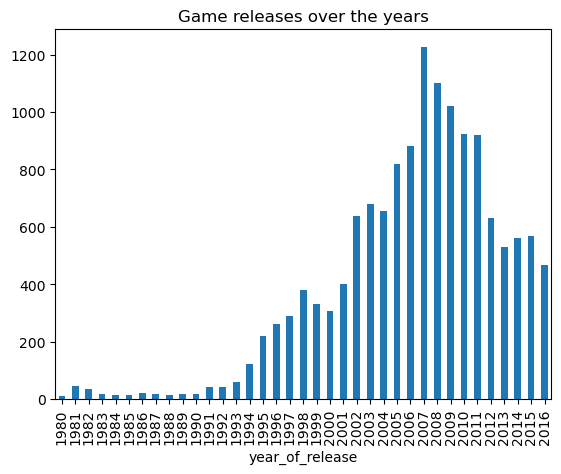

In [23]:
games_over_years = df_games['year_of_release'].value_counts()
games_over_years=games_over_years.sort_index(ascending=True)
games_over_years.plot(kind='bar',title='Game releases over the years')


On the next graphic we can observe a semi-normal distribution on the pass over the years releases, we can identify that the year with most games on the platform is 2007, where there was more than 1200 games released, and the years from 1980 to 1994 were very low on releases, where there could be an indicative that games were not that popular or sell in mass as of the recent years. It can also explain that maybe the company has only a certain amount of access to recent games, and that would explain why when we get closer to the current year, the releases point down again.

### Platforms best selling

Now we should take a look at the platform sales

In [24]:
# First we will pick the platforms that have over 500 sales
top_platform_over_500_sells = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=True).reset_index('platform')
top_platform_over_500_sells=top_platform_over_500_sells[top_platform_over_500_sells['total_sales']>500]
top_platform_over_500_sells

,platform,total_sales
25,DS,657.00
26,PS,717.24
27,Wii,807.14
28,PS3,929.40
29,X360,958.84
30,PS2,1191.93


Now lets see how the platforms with more sales look like over the years tracking their sales

In [25]:
def graph_platform_sales_over_years(platform):
    # Filter the data for the selected platform
    platform_sales = df_games[df_games['platform'] == platform]

    # Group by 'year' and calculate the average sales for each year
    average_sales_by_year = platform_sales.groupby('year_of_release')['total_sales'].sum().sort_index(ascending=True)

    # Create the bar plot
    plt.figure(figsize=(4, 2))
    average_sales_by_year.plot(kind='bar', color='skyblue')

    # Add titles and labels
    plt.title(f'Average Sales for {platform} by Year')
    plt.xlabel('Year')
    plt.ylabel('Average Sales')

    # Display grid for better readability
    plt.grid(True, axis='y')

    # Show the plot
    plt.show()

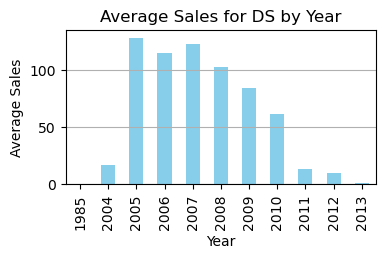

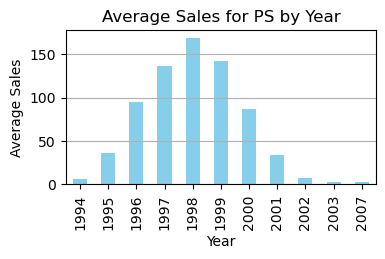

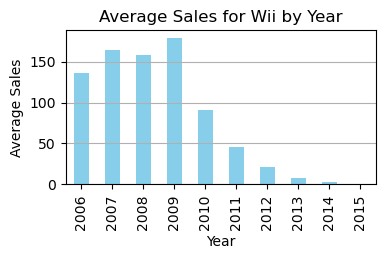

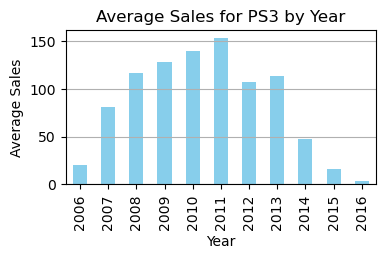

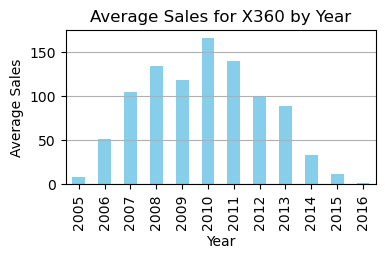

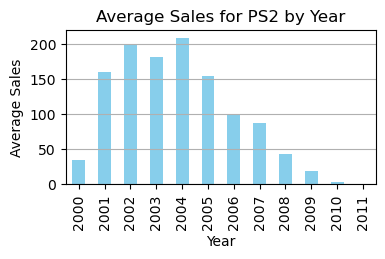

In [26]:
for pt in top_platform_over_500_sells['platform']:
    graph_platform_sales_over_years(pt)

Looking at the graphs of the most sells on platforms we can be sure of something, and it is that normally the platforms take a year to become popular and to increase their sells, and also, we can analyze that their popularity increases and stops in the span of 5 to 6 years, later than that the platform suffers an aggressive fall for the coninuous years. This can be because of the release of the competence or of another platform that is a newer version of the old one.

### Platforms Relevant Scope

Now we can get a view on the platform sales over every year to see which ones are currently popular

In [27]:
platform_yearly_sales = df_games.groupby(by=['platform','year_of_release'])['total_sales'].sum().sort_index(ascending=True).reset_index(name='sales')

platform_yearly_sales=pd.DataFrame(platform_yearly_sales)
currently_relevant_platforms = platform_yearly_sales[platform_yearly_sales['year_of_release'] == 2016].sort_values('sales',ascending=False)
currently_relevant_platforms

,platform,year_of_release,sales
161,PS4,2016,69.15
242,XOne,2016,25.82
19,3DS,2016,15.10
122,PC,2016,5.22
217,WiiU,2016,4.30
180,PSV,2016,4.24
157,PS3,2016,3.16
229,X360,2016,1.22


Filtering the sales of the 2016 lets us know what are the current platforms that are generating sales in the online store.

We can see on the resulting dataframe that there are three current platforms that are receiving higher peaks of sales, lets take a look to see their progress over the years with the previous funciton we created

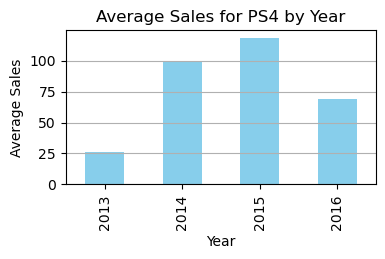

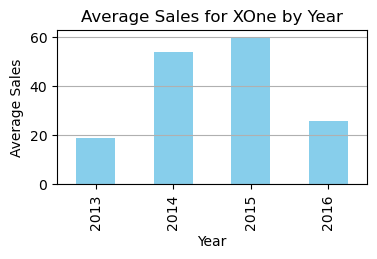

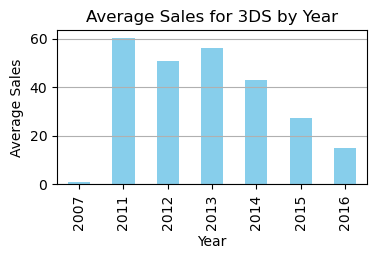

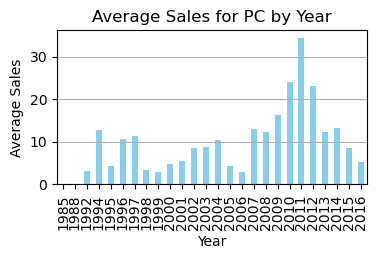

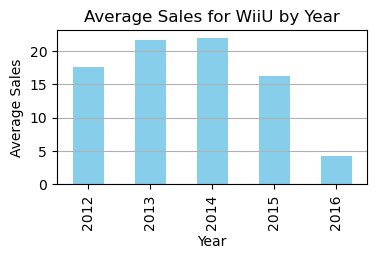

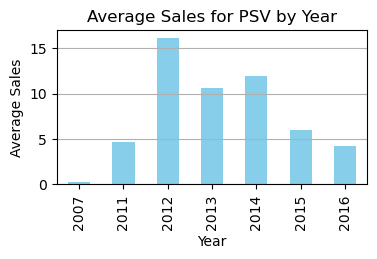

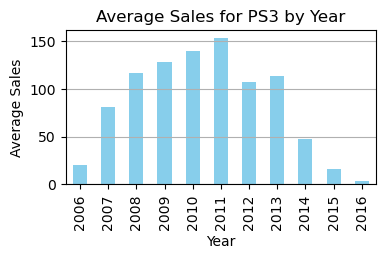

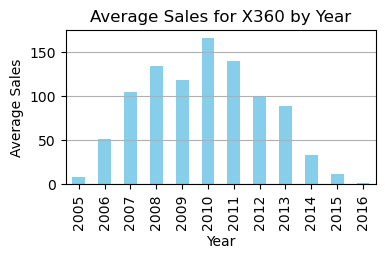

In [28]:
for pt in currently_relevant_platforms['platform']:
    graph_platform_sales_over_years(pt)

Looking closer at the graphics we can be certain of the next:
* Platforms like PS4, XOne and WiiU are in the span of 5-6 years that a platform is popular and produces bigger sales
* New Platforms will be appearing in the next 2-3 years due to the behavior of the platforms on the previous dot
* Platforms like 3DS, PSV, PS3 and X360 are getting reeplaced by the better version of the console and by other new consoles, so they won't be producing an augmentation on their sells bigger than their last year
* PC is a constant that tends to remain in a lower point on popularity

Taking another look to the data we can present a view of all the platforms sales from all time in a boxplot graphic to see how the platform sales have been behaving

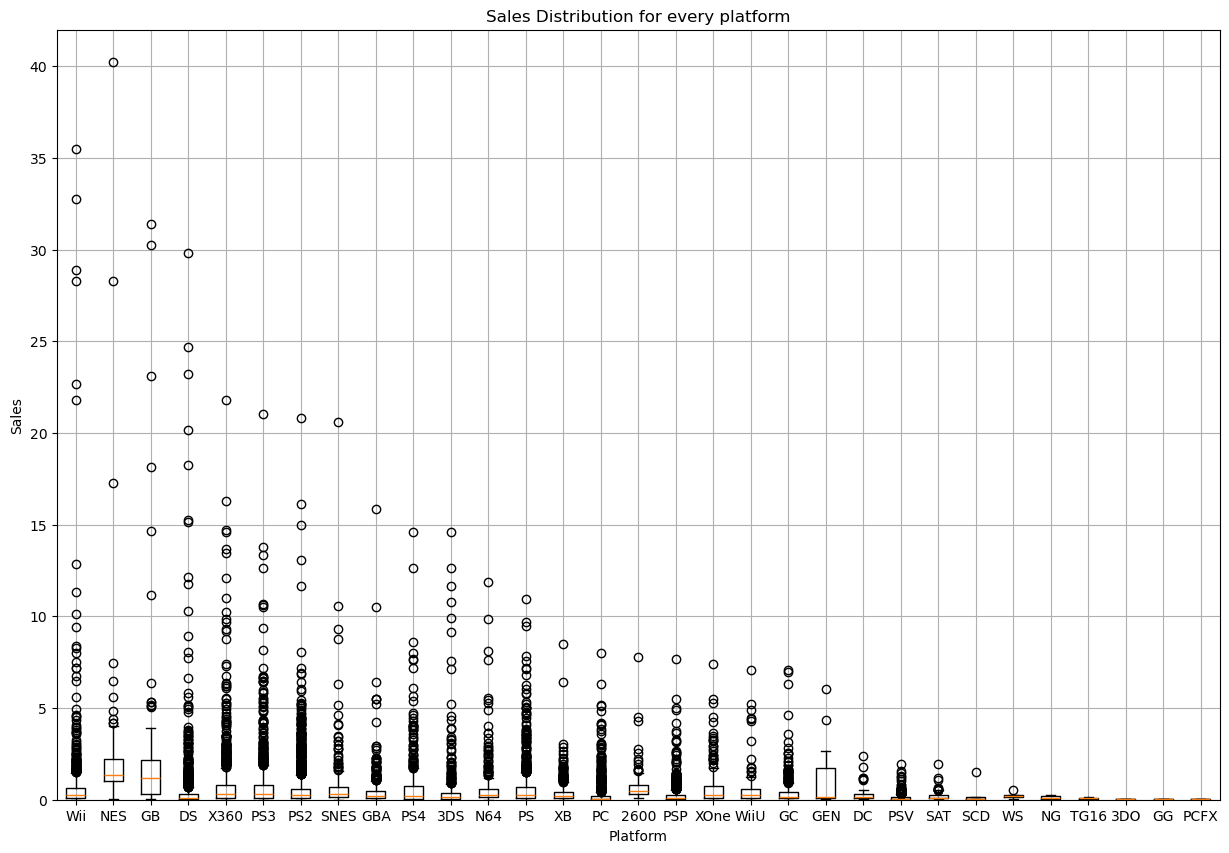

In [29]:
all_platforms = df_games['platform'].unique()
all_platforms_sales = []

for pt in all_platforms:
    all_platforms_sales.append(df_games[df_games['platform'] == pt]['total_sales'])

# Create the boxplot
plt.figure(figsize=(15, 10))

# Creating boxplots side by side
plt.boxplot(all_platforms_sales, labels=all_platforms)

# Add titles and labels
plt.title('Sales Distribution for every platform')
plt.xlabel('Platform')
plt.ylabel('Sales')

# Display grid
plt.grid(True)

plt.ylim(0,42)

# Show the plot
plt.show()

We can see now the previous graphic and understand that over the years, the most common year sale to have are sales that do not exceed 1. This means that for the vast mayority of the games their sales end up from 0.01 to 1 normally for each game.

We can also see on the graphic that there are moments where some games popularity exceed even the 35 in sales. (This can be seen when looking at the dots that are outside the boxes, which represent atypical values)

### Total Sales Correlation

Now we can also see the correlation between the critic score, user_score and the total_sales to see if they have correlation between each other

In [30]:
df_games[['critic_score','user_score','total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.535169,0.184183
user_score,0.535169,1.000000,0.055663
total_sales,0.184183,0.055663,1.000000


<Axes: xlabel='critic_score', ylabel='user_score'>

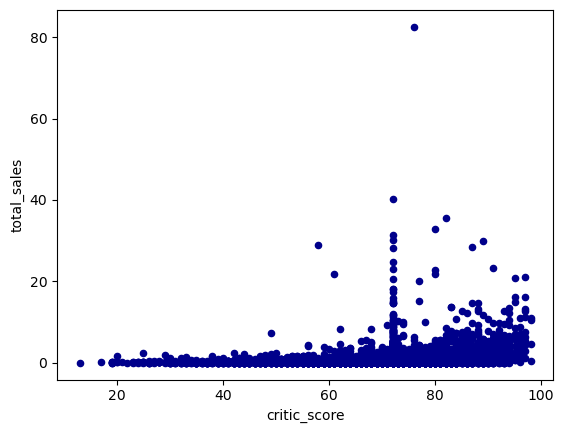

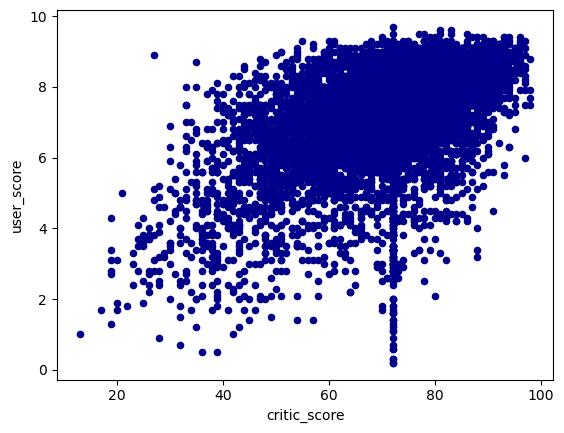

In [31]:
df_games[['critic_score','user_score','total_sales']].plot.scatter(x='critic_score',y='total_sales',c='DarkBlue')
df_games[['critic_score','user_score','total_sales']].plot.scatter(x='critic_score',y='user_score',c='DarkBlue')

We can see that the scores does not have anything to do with the total sales the games have, but at the same time we can see that the critic score and the user score are moderately correlated to each other.

### Genre

Finally we can take a look at how the genre of a game affects its sales and see if there is an indicator to which are the mos popular ones

In [32]:
top_5_sales_by_genre = df_games.groupby(by=['genre'])['total_sales'].sum().reset_index('genre').sort_values('total_sales',ascending=False)
#top_5_sales_by_genre = top_5_sales_by_genre.head(5)
top_5_sales_by_genre

,genre,total_sales
0,Action,1674.56
10,Sports,1248.17
8,Shooter,1044.82
7,Role-Playing,931.11
4,Platform,800.01
3,Misc,702.69
6,Racing,693.52
2,Fighting,441.79
9,Simulation,333.38
5,Puzzle,210.33


In [33]:
def graph_genre_sales_over_years(genre):
    # Filter the data for the selected genre
    genre_sales = df_games[df_games['genre'] == genre]

    # Group by 'year' and calculate the average sales for each year
    average_sales_by_year = genre_sales.groupby('year_of_release')['total_sales'].sum().sort_index(ascending=True)

    # Create the bar plot
    plt.figure(figsize=(4, 4))
    average_sales_by_year.plot(kind='bar', color='skyblue')

    # Add titles and labels
    plt.title(f'Average Sales for {genre} by Year')
    plt.xlabel('Year')
    plt.ylabel('Average Sales')

    # Display grid for better readability
    plt.grid(True, axis='y')

    plt.xlim(15,37)

    # Show the plot
    plt.show()

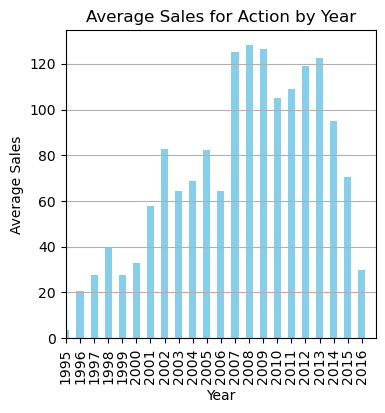

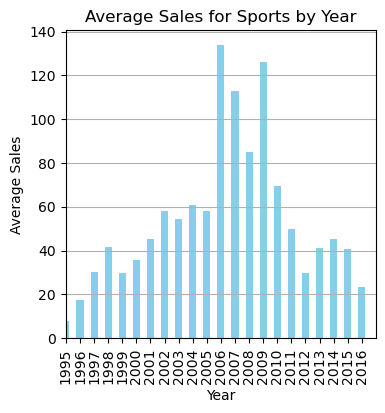

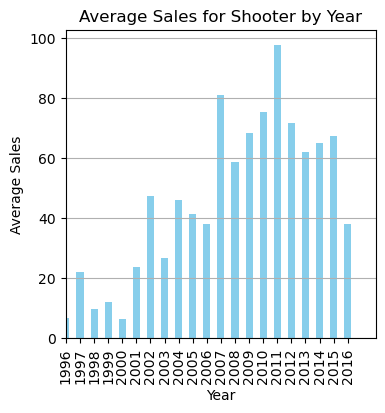

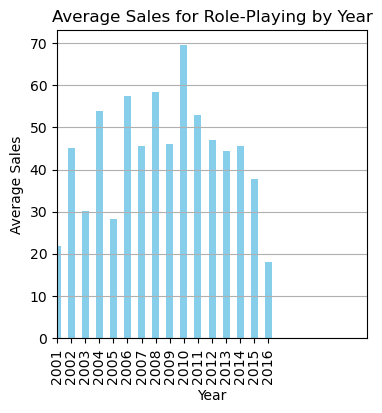

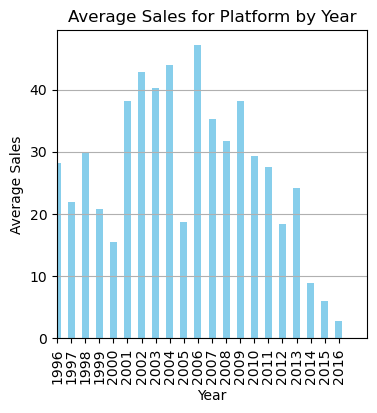

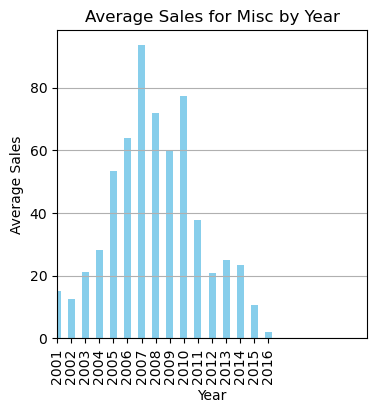

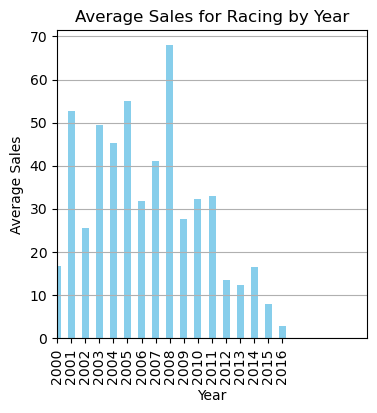

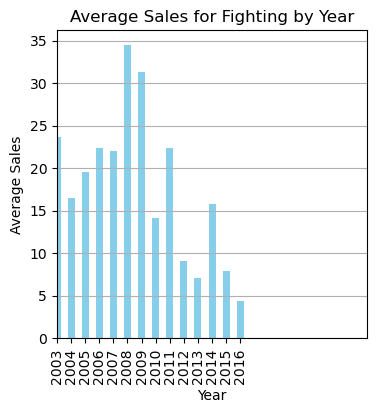

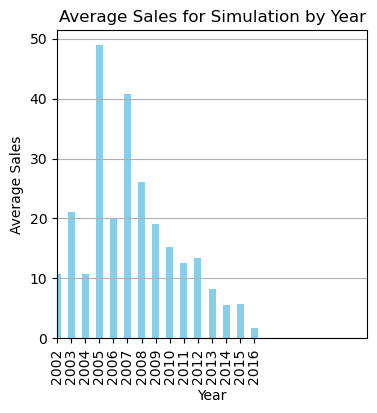

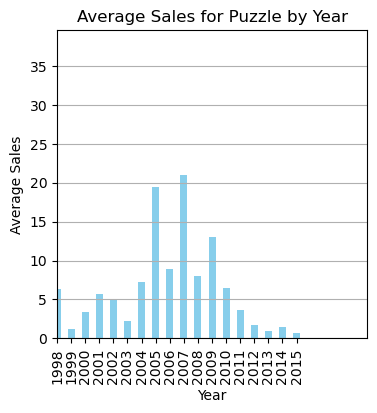

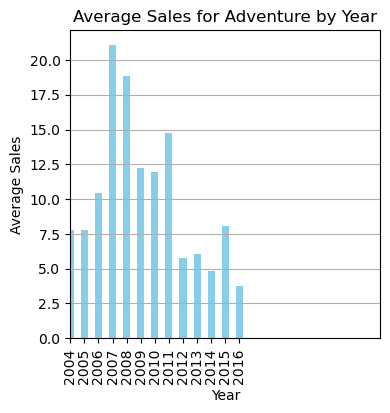

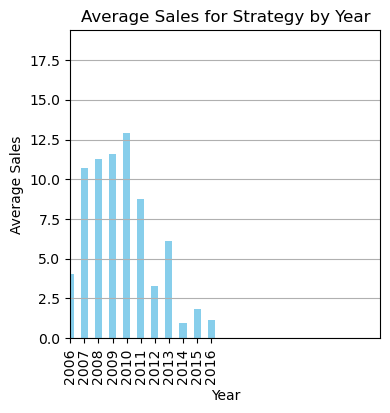

In [34]:
for gr in top_5_sales_by_genre['genre']:
    graph_genre_sales_over_years(gr)

Looking at the next graphics we can realize that theres some genres that are going to stay relevant for the next years because of how they have behaved in the previous years:
* Action
* Shooter
* Role-Playing

## Region Separation

Now we would like to get closer to a conclusion by analyzing each of the regions and its weaker and stronger points to have a complete and in depht analysis.

### Platform sales

First we would like to take a look at the platform sales again but per region to see which platforms have better impact

In [35]:
regions = ['na_sales','eu_sales','jp_sales']

for rg in regions:
    top_5_region_platform = df_games[['platform',rg]].groupby('platform')[rg].sum().sort_values(ascending=False).reset_index('platform').head(5)
    print(top_5_region_platform)

  platform  na_sales
0     X360    592.50
1      PS2    553.91
2      Wii    421.90
3      PS3    387.16
4       PS    328.92
  platform  eu_sales
0      PS3    327.96
1      PS2    316.99
2     X360    269.18
3      Wii    245.05
4       PS    208.49
  platform  jp_sales
0       DS    172.09
1       PS    139.82
2      PS2    138.41
3     SNES    116.55
4      3DS    100.44


We can se that na has the most sales out of their 5 best platform games, so we can certainly say that na is a big contributor to the online business and has the biggest public of clients. We can also see that there is a little tendency on the platform popularity over the country, the biggest platform sales on NA is Xbox 360 which its origins are from United States, then looking at Japan Platform sales, we can also realize that the only platforms on the top 5 of sales are all Japanese Platforms which can be explained of how the marketing inside the countries affects the consumerism of games inside it. Meanwhile eu sales are a mixed of both leaning more into Japanese Platforms like PS and X360.

### Genre Sales

Now we should take a look at the genres of every region to see which genre is the preferred one by region

In [36]:
for rg in regions:
    top_5_region_genre = df_games[['genre',rg]].groupby('genre')[rg].sum().sort_values(ascending=False).reset_index('genre').head(5)
    print(top_5_region_genre)

      genre  na_sales
0    Action    833.09
1    Sports    628.66
2   Shooter    586.66
3  Platform    426.98
4      Misc    339.51
      genre  eu_sales
0    Action    502.54
1    Sports    357.48
2   Shooter    315.74
3    Racing    228.58
4  Platform    192.91
          genre  jp_sales
0  Role-Playing    355.05
1        Action    160.14
2        Sports    134.67
3      Platform    130.61
4          Misc    107.40


In these results we can perceive that both NA and EU public leans to buy more Action, Sports and Shooter Games, meanwhile in Japan we see the Role-playing genre take the 1st place for more than the double of the other genres separatedly, but also having Action and Sports on the 2nd and 3rd place.

## Hipotesis

Now to start closing this analysis, with all that we have tested and proved, we can start making our important assumptions about how can we find iformation that will be useful to make decisions.

### Xbox One and PC user scores

We first start by planning the Null Hipotesis, which will be:

**H0: The mean scores for user on both platforms XOne and Pc are the same**

Then we create our Alternative Hipotesis

**H1: The mean scores for user on both platforms XOne and Pc are the different**

In [37]:
# First we would want to assign alpha the value we belive is wise for this analysis
alpha = 0.05

# The assign our arrays with values
user_scores_xone = df_games[df_games['platform'] == 'XOne']['user_score']
user_scores_pc = df_games[df_games['platform'] == 'PC']['user_score']

In [38]:
# The we would like to test the variances of both arrays of data using the lavenes test
levene_stat, pvalue_levene = st.levene(user_scores_xone,user_scores_pc)

if (pvalue_levene <= alpha):
    print('The variances are different')
    equal_var = False
else:
    print('The variances are equal')
    equal_var = True
print('pvalue levene:',pvalue_levene)

The variances are equal
pvalue levene: 0.8041485863642505


In [39]:
# For the last step we need to define our hipotesis using the Ttest
results = st.ttest_ind(user_scores_xone, user_scores_pc, equal_var=equal_var)

print('valor p: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hipotesis, The mean scores for user on both platforms XOne and Pc are the different')
else:
    print('We accept the null hipotesis, The mean scores for user on both platforms XOne and Pc are the equal')

valor p:  0.00011153254097833982
We reject the null hipotesis, The mean scores for user on both platforms XOne and Pc are the different


This previous test was done with the purpose of knowing if PC games are equally well received and rated by users as the XOne ratings. For the Ttest answer we can be sure that they are rated diofferent among users.

### Action and Sports genre user_scores

We first start by planning the Null Hipotesis, which will be:

**H0: The mean scores for user on both genre Action and Sports are the same**

Then we create our Alternative Hipotesis

**H1: The mean scores for user on both genre Action and Sports are the different**

In [41]:
# First we would want to assign alpha the value we belive is wise for this analysis
alpha = 0.05

# The assign our arrays with values
user_scores_action = df_games[df_games['genre'] == 'Action']['user_score']
user_scores_sports = df_games[df_games['genre'] == 'Sports']['user_score']

In [42]:
# The we would like to test the variances of both arrays of data using the lavenes test
levene_stat, pvalue_levene = st.levene(user_scores_action,user_scores_sports)

if (pvalue_levene <= alpha):
    print('The variances are different')
    equal_var = False
else:
    print('The variances are equal')
    equal_var = True
print('pvalue levene:',pvalue_levene)

The variances are equal
pvalue levene: 0.18712203702959745


In [44]:
# For the last step we need to define our hipotesis using the Ttest
results = st.ttest_ind(user_scores_action, user_scores_sports, equal_var=equal_var)

print('valor p: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hipotesis, The mean scores for user on both genre Action and Sports are different')
else:
    print('We accept the null hipotesis, The mean scores for user on both genre Action and Sports are equal')

valor p:  0.31669456596184403
We accept the null hipotesis, The mean scores for user on both genre Action and Sports are equal


With this previous test we confirmed that Action Games and Sports Games are similarly well received from one another. So we can conclude that They are a big hit in the Store, so we can expect to see new pupular games having this genres.

## Conclusion

With all the previous analysis that we have done throught this document, we can start to conclude what we have learnt about the behaviour and the popularity of games.

* We can say that the market in this point in time (2016) is going to have a big change in the coming 2 to 3 years, this was concluded because looking at the sales charts, the lifespan of popularity of the platforms right now will start to decay, contemplating that a console's popularity takes 5 to 6 years from their release, to decrease their sales, this gives foot to a new generation of consoles in order to keep the momentum and relevancy of the sales high due to novelty and innovation on consoles.
* We can say as for right now that the consoles that will be sales relevant for the upcoming 2017, will be PS4 and Xbox One due to their span of life where both came in the market on 2013.
* We can also conclude that the best genre type for games according to users and to sales are Action, Sports, Role-playing for Japan and Shooter for Europe and North America.
* We can conclude with our Hipotesis that probably the vast majority of the public likes Action and Sports alike due to their user score ratings.

And also we can also talk with the company to ensure somethings to nourish more the analysis:
* We can talk about why there has been less releases since 2011, and clarify that maybe the company do not have access to a population of most games with a year release further than 2011, and cannot register them and sell them on their own Gamin Store.
* We can talk with the company about the lack of information on their data when it comes to "critic_score", "user_score" and "rating" columns
* We should also clarify at what point of the year this data was created, because looking into the analysis we can observer that all 2016 sales are down, maybe implicating that the time when this dataset was created, it was still early of 2016's year.

*Project made by Ian Salas López in collaboration with Tripleten*